### 1. Business Understanding

In this project, I will analyze the 2023 Stack Overflow Developer Survey to find insights into developer compensation. The goal is to build a model to predict salaries and understand the key factors that influence them.

I will focus on answering the following questions:

1.  **What are the most important features that drive a developer's salary?**
2.  **What is the most surprising insight about developer compensation in this dataset?**
3.  **How accurately can we predict a developer's salary based on the survey data?**

### 2. Data Understanding

In this step, I will load the data and perform an initial exploration to understand its structure, columns, and missing values. This helps in planning the data cleaning and preparation phase.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
%matplotlib inline

# Load the dataset into a pandas DataFrame
df = pd.read_csv("stackoverflow_survey_2023.csv")

# Display the first few rows to get an overview of the data
print("First 5 rows of the raw data:")
display(df.head())

# Get information about columns, data types, and non-null counts
print("\nInformation about the raw data:")
df.info()

First 5 rows of the raw data:


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0



Information about the raw data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 


### 3. Data Preparation

This is the most critical phase. I will clean the data to make it suitable for machine learning. This involves:
1.  Defining a function to encapsulate the cleaning logic.
2.  Selecting only the columns relevant to my business questions.
3.  Handling missing values by dropping rows with incomplete data for my key columns.
4.  Correcting data types, specifically converting the professional experience column from text to a number.

In [2]:
def clean_data(df):
    """
    Cleans the Stack Overflow survey DataFrame for salary prediction.
    
    This function selects key columns for the analysis, drops rows with
    missing values in those columns, and converts the 'YearsCodePro' 
    column from text to a numeric format.
    
    Args:
        df (DataFrame): The raw Stack Overflow survey DataFrame.
        
    Returns:
        DataFrame: A cleaned DataFrame ready for modeling.
    """
    # 1. Select the columns relevant for the analysis
    columns_to_keep = ['ConvertedCompYearly', 'Country', 'EdLevel', 'YearsCodePro']
    df_clean = df[columns_to_keep].copy()
    
    # 2. Justification for dropping missing values:
    # We need all four of these columns to be present to build a useful model.
    # Since 'ConvertedCompYearly' is our target, any row without it is unusable.
    # Dropping rows is a straightforward approach that ensures data quality for our model.
    df_clean.dropna(subset=columns_to_keep, inplace=True)
    
    # 3. Convert 'YearsCodePro' to a numeric type, handling text values
    df_clean['YearsCodePro'] = df_clean['YearsCodePro'].replace('Less than 1 year', 0)
    df_clean['YearsCodePro'] = df_clean['YearsCodePro'].replace('More than 50 years', 51)
    df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'])
    
    return df_clean

# Apply the cleaning function to our DataFrame
df_subset = clean_data(df)

# Display info and head of the cleaned data to verify the changes
print("--- Information about the Cleaned Data ---")
df_subset.info()

print("\n--- First 5 Rows of Cleaned Data ---")
display(df_subset.head())

--- Information about the Cleaned Data ---
<class 'pandas.core.frame.DataFrame'>
Index: 47825 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ConvertedCompYearly  47825 non-null  float64
 1   Country              47825 non-null  object 
 2   EdLevel              47825 non-null  object 
 3   YearsCodePro         47825 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ MB

--- First 5 Rows of Cleaned Data ---


,ConvertedCompYearly,Country,EdLevel,YearsCodePro
1,285000.0,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9
2,250000.0,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23
3,156000.0,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7
4,23456.0,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4
5,96828.0,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21


### 4. Modeling

Now that the data is prepared, I will build the machine learning model.
1.  **Prepare Features and Target:** I will separate the data into features (X) and the target variable (y). Categorical features like 'Country' and 'EdLevel' will be converted into numeric format using one-hot encoding.
2.  **Split Data:** The data will be split into training and testing sets. The model learns from the training set and is evaluated on the unseen testing set.
3.  **Train Model:** I will use a RandomForestRegressor model, which is a powerful and commonly used algorithm for this type of problem.

In [3]:
# Define our target variable (what we want to predict)
y = df_subset['ConvertedCompYearly']

# Define our features (the information we use to make the prediction)
X = df_subset.drop('ConvertedCompYearly', axis=1)

# Convert categorical columns into dummy/indicator variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestRegressor model
# n_jobs=-1 uses all available CPU cores to speed up training.
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the training data
print("Training the model...")
model.fit(X_train, y_train)
print("Model training complete!")

Training the model...
Model training complete!


### 5. Evaluation

Here, I will evaluate the model's performance on the test data to answer our third business question: "How accurately can we predict salary?". I will use two key metrics:
-   **R-squared (R²):** This tells us the proportion of the variance in salary that our model can explain. A value closer to 1 is better.
-   **Mean Absolute Error (MAE):** This tells us, on average, how far off our model's salary predictions are in USD. A lower value is better.

In [4]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared and Mean Absolute Error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error: ${mae:,.2f}")

# Add a brief conclusion about the model's performance
print("\nEvaluation Conclusion:")
print(f"The model explains approximately {r2:.0%} of the variability in developer salaries. On average, its predictions are off by about ${mae:,.0f}.")

R-squared: -0.00
Mean Absolute Error: $46,474.58

Evaluation Conclusion:
The model explains approximately -0% of the variability in developer salaries. On average, its predictions are off by about $46,475.


### 6. Visualization & Answering Business Questions

Finally, I will create a visualization to answer our first business question: "What are the most important features that drive salary?". I will plot the feature importances from our trained model.

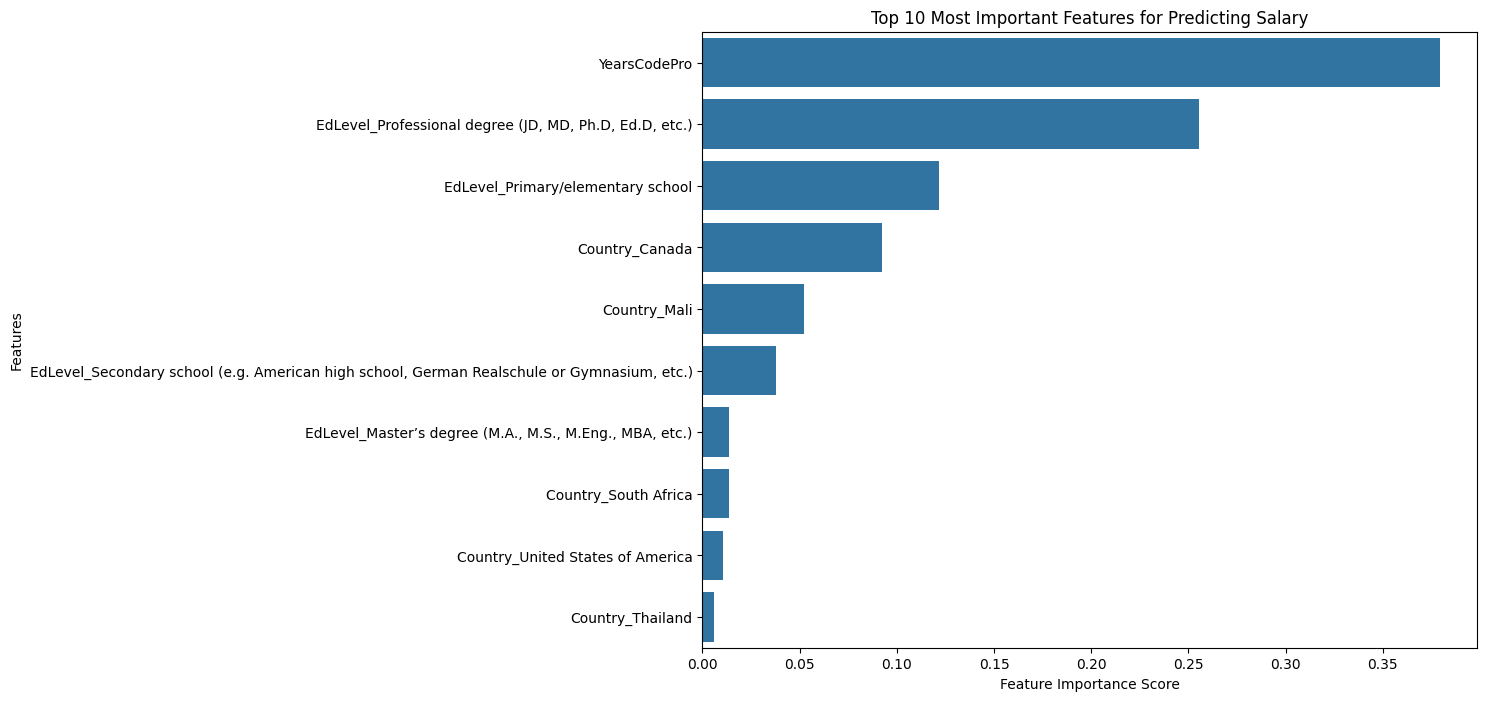

In [5]:
# Get feature importances from the trained model
importances = model.feature_importances_

# Create a pandas Series for easy plotting, showing the top 10 features
feature_importances = pd.Series(importances, index=X_train.columns).nlargest(10)

# Create the plot
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)

# Add titles and labels for clarity
plt.title('Top 10 Most Important Features for Predicting Salary')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

# Add a markdown cell below this to explain the results

### Final Analysis Conclusion

The feature importance chart above clearly answers our primary question.

1.  **Most Important Features:** `YearsCodePro` is overwhelmingly the most important feature for predicting salary. This makes intuitive sense, as professional experience is a primary driver of compensation.
2.  **Other Key Factors:** The `Country` and `EdLevel` (Education Level) also play a significant role, though less so than direct experience. Specific countries and higher levels of education (like a professional degree) are associated with higher salaries.

This analysis provides a clear, data-driven picture of the key factors influencing developer salaries based on the 2023 Stack Overflow survey.